In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import plotly.graph_objects as go
import requests
import json
import glob
import datetime
import plotly.express as px
from config import api_key
from config import mapbox_token
from calendar import monthrange


# Data pulled from U.S. Fish & Wildlife Service
# https://ecos.fws.gov/ecp/report/species-listings-by-tax-group?statusCategory=Listed&groupName=Birds
endangered_bird_data_to_load = "Resources/endangered_birds.csv"

endangered_birds_data = pd.read_csv(endangered_bird_data_to_load)

![USFW Regions](Resources/Images/USFW_Regions.png)

In [4]:
# Number of endangered bird that can be found in each US Fish and Wildlife Service Region.
endangered_df = endangered_birds_data
endangered_df["Region  "].value_counts()

1    50
4    22
2    12
8    10
7     4
5     3
6     1
3     1
Name: Region  , dtype: int64

### Requesting all bird sightings in the US that have been logged over the last 7 days.
#### This data will be merged with endangered species list to show only the birds that are listed as endangered or threatened.

In [5]:
regionCode = "US"

url = f"https://api.ebird.org/v2/data/obs/{regionCode}/recent"

r = requests.get(url, params={"key": api_key, "back": 7})

In [6]:
r.url

'https://api.ebird.org/v2/data/obs/US/recent?key=d56mdhi9b35r&back=7'

In [7]:
r.status_code

200

In [8]:
data = r.json()

In [9]:
# This is the recent sightings DataFrame
recent_birds_df = pd.DataFrame(data)
recent_birds_df

speciesCode                                    comName  \
0       norhar2                           Northern Harrier   
1        greegr                                Great Egret   
2        eursta                          European Starling   
3        turvul                             Turkey Vulture   
4        rengre                           Red-necked Grebe   
..          ...                                        ...   
975      x00801  Downy x Ladder-backed Woodpecker (hybrid)   
976     curlew1                                 curlew sp.   
977     thalas1                             Thalasseus sp.   
978      borowl                                 Boreal Owl   
979      norwhe                          Northern Wheatear   

                            sciName      locId  \
0                  Circus hudsonius  L12391855   
1                        Ardea alba  L12391841   
2                  Sturnus vulgaris  L12391841   
3                    Cathartes aura  L12391841   
4                Podiceps grisegena    L354419   
..                              ...        ...   
975  Dryobates pubescens x scalaris    L284163   
976                    Numenius sp.   L7014778   
977                  Thalasseus sp.   L6227462   
978               Aegolius funereus  L12373333   
979               Oenanthe oenanthe    L129046   

                                               locName             obsDt  \
0      49 Depot Rd, Hartland US-VT 43.53549, -72.38853  2020-09-29 11:58   
1    17411 23 Mile Rd, Macomb US-MI 42.67172, -82.9...  2020-09-29 11:56   
2    17411 23 Mile Rd, Macomb US-MI 42.67172, -82.9...  2020-09-29 11:56   
3    17411 23 Mile Rd, Macomb US-MI 42.67172, -82.9...  2020-09-29 11:56   
4                                    Cersosimo Setback  2020-09-29 11:56   
..                                                 ...               ...   
975                Galveston--Lafitte's Cove (UTC 068)  2020-09-23 08:52   
976                                 Loch Lomond Marina  2020-09-23 08:50   
977                         Siesta Key--Beach Access 7  2020-09-23 07:20   
978  Jewel Basin Rd, Flathead NF, 48.16324, -113.95135  2020-09-22 21:38   
979                                   Parker River NWR  2020-09-22 17:56   

     howMany        lat         lng  obsValid  obsReviewed  locationPrivate  \
0        1.0  43.535489  -72.388532      True        False             True   
1        1.0  42.671716  -82.948940      True        False             True   
2        8.0  42.671716  -82.948940      True        False             True   
3        1.0  42.671716  -82.948940      True        False             True   
4        1.0  42.830414  -72.549825      True        False            False   
..       ...        ...         ...       ...          ...              ...   
975      1.0  29.216901  -94.934902      True        False            False   
976      1.0  37.973631 -122.481135      True        False            False   
977      1.0  27.270313  -82.562868      True         True            False   
978      1.0  48.163243 -113.951353      True        False             True   
979      1.0  42.763901  -70.802300      True         True            False   

         subId  
0    S74207662  
1    S74207586  
2    S74207586  
3    S74207586  
4    S74207535  
..         ...  
975  S73963715  
976  S73974985  
977  S73954353  
978  S74096016  
979  S73941514  

[980 rows x 13 columns]

In [10]:
endangered_df.head()

Scientific Name                   Common Name  \
0       Akialoa stejnegeri  Kauai akialoa (honeycreeper)   
1      Hemignathus wilsoni                    akiapolaau   
2  Gymnogyps californianus             California condor   
3           Grus americana                Whooping crane   
4       Corvus hawaiiensis       Hawaiian (='alala) Crow   

                                        Where Listed  Region    \
0                                     Wherever found         1   
1                                     Wherever found         1   
2  U.S.A. only, except where listed as an experim...         8   
3  Wherever found, except where listed as an expe...         2   
4                                     Wherever found         1   

  ESA Listing Status    
0           Endangered  
1           Endangered  
2           Endangered  
3           Endangered  
4           Endangered

In [11]:
# Merging endangered bird DataFrame with recent sightings DataFrame
endangered_recent_df = endangered_df.merge(
    recent_birds_df, left_on="Scientific Name", right_on="sciName"
)
endangered_recent_df

Scientific Name             Common Name  \
0    Gymnogyps californianus       California condor   
1    Gymnogyps californianus       California condor   
2             Grus americana          Whooping crane   
3             Grus americana          Whooping crane   
4             Grus americana          Whooping crane   
5             Grus americana          Whooping crane   
6            Anas wyvilliana  Hawaiian (=koloa) Duck   
7   Pterodroma sandwichensis         Hawaiian petrel   
8         Mycteria americana              Wood stork   
9         Charadrius melodus           Piping Plover   
10        Charadrius melodus           Piping Plover   
11   Aphelocoma coerulescens       Florida scrub-jay   
12  Brachyramphus marmoratus        Marbled murrelet   
13       Coccyzus americanus    Yellow-billed Cuckoo   
14         Drepanis coccinea                  `I`iwi   

                                         Where Listed  Region    \
0   U.S.A. only, except where listed as an experim...         8   
1   U.S.A. (specific portions of Arizona, Nevada, ...         8   
2   Wherever found, except where listed as an expe...         2   
3   U.S.A. (CO, ID, FL, NM, UT, and the western ha...         4   
4   U.S.A. (AL, AR, CO, FL, GA, ID, IL, IN, IA, KY...         2   
5                      U.S.A (Southwestern Louisiana)         4   
6                                      Wherever found         1   
7                                      Wherever found         1   
8                              AL, FL, GA, MS, NC, SC         4   
9   [Great Lakes watershed DPS] - Great Lakes, wat...         3   
10  [Atlantic Coast and Northern Great Plains popu...         5   
11                                     Wherever found         4   
12                                U.S.A. (CA, OR, WA)         1   
13                                   Western U.S. DPS         2   
14                                     Wherever found         1   

                      ESA Listing Status   speciesCode               comName  \
0                               Endangered      calcon     California Condor   
1   Experimental Population, Non-Essential      calcon     California Condor   
2                               Endangered      whocra        Whooping Crane   
3   Experimental Population, Non-Essential      whocra        Whooping Crane   
4   Experimental Population, Non-Essential      whocra        Whooping Crane   
5   Experimental Population, Non-Essential      whocra        Whooping Crane   
6                               Endangered      hawduc         Hawaiian Duck   
7                               Endangered     hawpet1       Hawaiian Petrel   
8                               Threatened      woosto            Wood Stork   
9                               Endangered      pipplo         Piping Plover   
10                              Threatened      pipplo         Piping Plover   
11                              Threatened      flsjay     Florida Scrub-Jay   
12                              Threatened      marmur      Marbled Murrelet   
13                              Threatened      yebcuc  Yellow-billed Cuckoo   
14                              Threatened        iiwi                  Iiwi   

                     sciName      locId  \
0    Gymnogyps californianus   L2299857   
1    Gymnogyps californianus   L2299857   
2             Grus americana  L12371400   
3             Grus americana  L12371400   
4             Grus americana  L12371400   
5             Grus americana  L12371400   
6            Anas wyvilliana   L1169080   
7   Pterodroma sandwichensis   L7991696   
8         Mycteria americana   L3285764   
9         Charadrius melodus   L3077954   
10        Charadrius melodus   L3077954   
11   Aphelocoma coerulescens    L127350   
12  Brachyramphus marmoratus   L1018792   
13       Coccyzus americanus   L2352540   
14         Drepanis coccinea    L880981   

                                   locName             obsDt  howMany  \


In [12]:
# Setting MapBox token.
px.set_mapbox_access_token(mapbox_token)

In [13]:
# Generating scatter map.
fig = px.scatter_mapbox(
    endangered_recent_df,
    lat="lat",
    lon="lng",
    color="howMany",
    hover_data=["Common Name", "Scientific Name", "Where Listed", "locName"],
    title="Endangered Bird Species Sitings in the United States (Last 7 Days)",
    height=750,
)

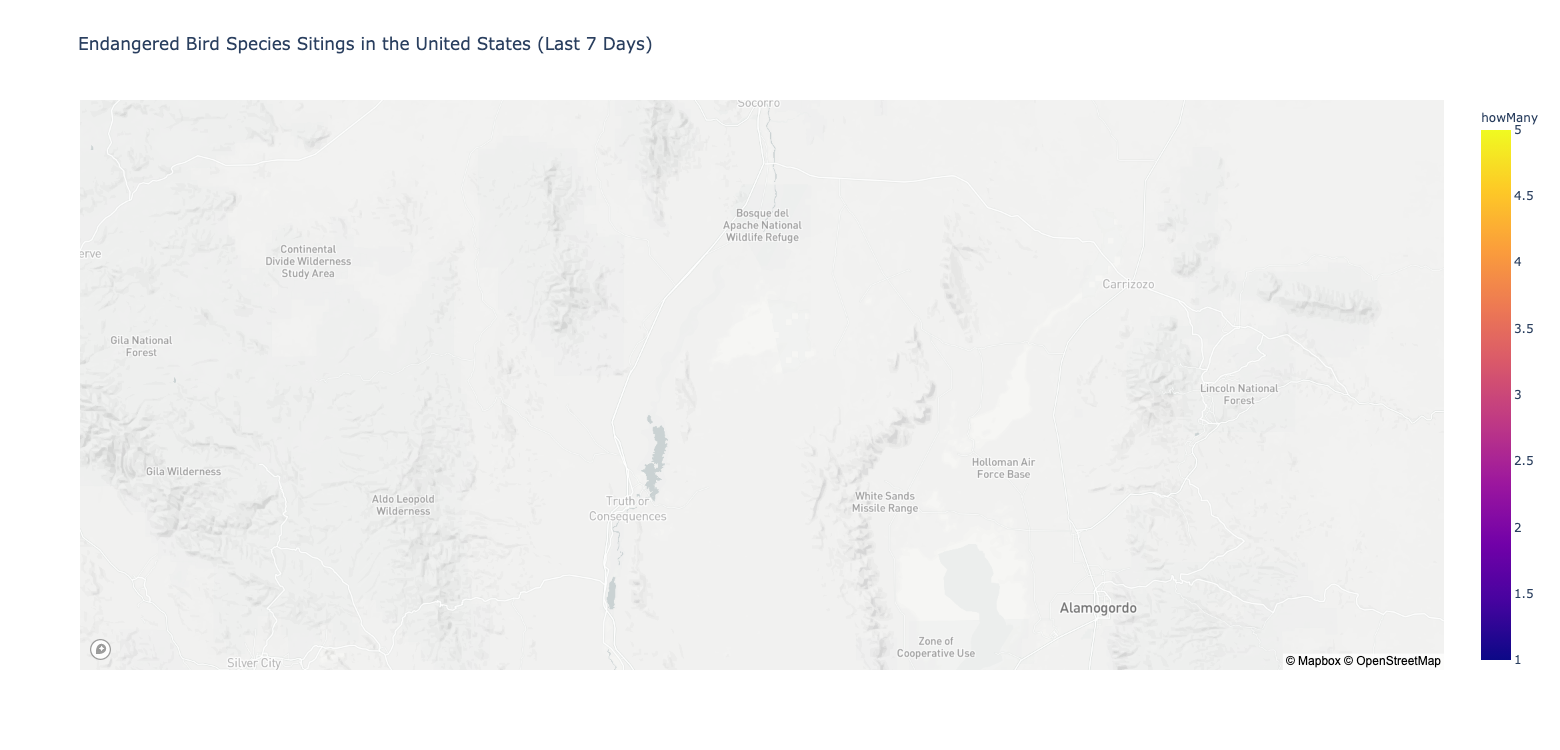

In [14]:
fig.show()

### Sightings for the birds in the endangered species list (sited in the last 7 days) in the state they were observed over several years.

#### (Requesting Data to determine the number of sightings for all birds that have been observed in the states indicated above.)

In [16]:
# List of years to plug into API request
year_list = ["2020", "2019", "2018", "2017", "2016", "2015", "2010", "2005", "2000"]

In [17]:
def extract_data(data):

    return {
        "Common Name": data["comName"],
        "Scientific Name": data["sciName"],
        "Date Sighted": data["obsDt"],
        "Location Name": data["locName"],
        "Num Sighted": data["howMany"],
        "Latitude": data["lat"],
        "Longitude": data["lng"],
    }

In [18]:
# Use this code to creat csv files for each state with endagered birds sited on date.
year_results = []
regionCode = "US-IL"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

# il_df = pd.DataFrame(year_results)
# il_df.to_csv("illinois_sightings.csv")

In [19]:
# Combining all CSVs that include the all of the bird sitings in the states that reported endangered bird sitings in the past 7 days. I picked the first day of Autumnfor each year indicated in year_list.
path = "Resources/Endangered_State_Files"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

birds_states_df = pd.concat(li, axis=0, ignore_index=True)

In [20]:
birds_states_df

Unnamed: 0                Common Name            Scientific Name  \
0               0  Black-crowned Night-Heron      Nycticorax nycticorax   
1               1           Great Horned Owl           Bubo virginianus   
2               2        Eastern Screech-Owl             Megascops asio   
3               3               Canada Goose          Branta canadensis   
4               4                    Mallard         Anas platyrhynchos   
...           ...                        ...                        ...   
12459        2925         Western Meadowlark         Sturnella neglecta   
12460        2926       Northern Waterthrush    Parkesia noveboracensis   
12461        2927         Townsend's Warbler        Setophaga townsendi   
12462        2928      Black-headed Grosbeak  Pheucticus melanocephalus   
12463        2929             Lazuli Bunting           Passerina amoena   

           Date Sighted                                      Location Name  \
0      2020-09-22 22:06                      Sanganois State Wildlife Area   
1      2020-09-22 21:08  9310 Wondermere Road, Wonder Lake, Illinois, U...   
2      2020-09-22 20:54                               Deerpath Wonder Lake   
3      2020-09-22 19:39           Kankakee River State Park (Kankakee Co.)   
4      2020-09-22 19:39           Kankakee River State Park (Kankakee Co.)   
...                 ...                                                ...   
12459        2000-09-22  China Lake NAWS--Sewage Ponds (restricted access)   
12460        2000-09-22                                      Madrona Marsh   
12461        2000-09-22                                       Mt. Davidson   
12462        2000-09-22                                       Mt. Davidson   
12463        2000-09-22                                      Madrona Marsh   

       Num Sighted   Latitude   Longitude  year  
0                1  40.125782  -90.301710  2020  
1                1  42.387891  -88.381657  2020  
2                1  42.377126  -88.377448  2020  
3               53  41.204403  -87.982864  2020  
4                5  41.204403  -87.982864  2020  
...            ...        ...         ...   ...  
12459            3  35.672219 -117.638340  2000  
12460            1  33.828650 -118.343280  2000  
12461            5  37.738370 -122.453399  2000  
12462            2  37.738370 -122.453399  2000  
12463            1  33.828650 -118.343280  2000  

[12464 rows x 9 columns]

In [21]:
# List of birds (scientific name) that have been seen in the US over the last 7 days.
endangered_list = endangered_recent_df["Scientific Name"].to_list()
endangered_list_unique = list(set(endangered_list))
endangered_list_unique

['Pterodroma sandwichensis',
 'Anas wyvilliana',
 'Gymnogyps californianus',
 'Aphelocoma coerulescens',
 'Coccyzus americanus',
 'Drepanis coccinea',
 'Brachyramphus marmoratus',
 'Grus americana',
 'Charadrius melodus',
 'Mycteria americana']

## Endangered bird sitings for the states that reported endagered bird sightings in the past seven days

![Endangered Header](Resources/Images/Endangered_Bird_Header.png)

In [22]:
endangered_bird_states_df = birds_states_df[
    birds_states_df["Scientific Name"].isin(endangered_list_unique)
]
endangered_bird_states_df

Unnamed: 0           Common Name           Scientific Name  \
106           106  Yellow-billed Cuckoo       Coccyzus americanus   
190           190        Whooping Crane            Grus americana   
256           256  Yellow-billed Cuckoo       Coccyzus americanus   
573           573  Yellow-billed Cuckoo       Coccyzus americanus   
750           750  Yellow-billed Cuckoo       Coccyzus americanus   
...           ...                   ...                       ...   
10755        1221      Marbled Murrelet  Brachyramphus marmoratus   
10956        1422      Marbled Murrelet  Brachyramphus marmoratus   
11892        2358      Marbled Murrelet  Brachyramphus marmoratus   
12075        2541     California Condor   Gymnogyps californianus   
12334        2800     California Condor   Gymnogyps californianus   

           Date Sighted                                 Location Name  \
106    2020-09-22 17:17   Crab Orchard NWR--Visitor Center Pond Trail   
190    2020-09-22 10:50                                Dee Bennett Rd   
256    2019-09-22 16:47                   Travis and Sara DeNeal home   
573    2018-09-22 13:51                                     Jewelwing   
750    2017-09-22 16:16                        Alhambra Firemans Park   
...                 ...                                           ...   
10755  2018-09-22 08:00                  Nearshore Half Moon Bay boat   
10956  2017-09-22 17:30                          Crescent City Harbor   
11892  2015-09-22 07:05        Blufftop Coastal Park and Poplar Beach   
12075  2010-09-22 15:00  Julia Pfeiffer Burns SP--McWay Cove vicinity   
12334        2005-09-22               California - Monterey - Big Sur   

       Num Sighted   Latitude   Longitude  year  
106              1  37.719310  -89.015570  2020  
190              1  41.327366  -88.968151  2020  
256              1  37.636403  -88.480013  2019  
573              1  39.504440  -88.085672  2018  
750              2  38.885968  -89.743002  2017  
...            ...        ...         ...   ...  
10755            5  37.495833 -122.467017  2018  
10956            2  41.744196 -124.191599  2017  
11892            2  37.454386 -122.443872  2015  
12075            1  36.158944 -121.670451  2010  
12334            1  36.264654 -121.801049  2005  

[93 rows x 9 columns]

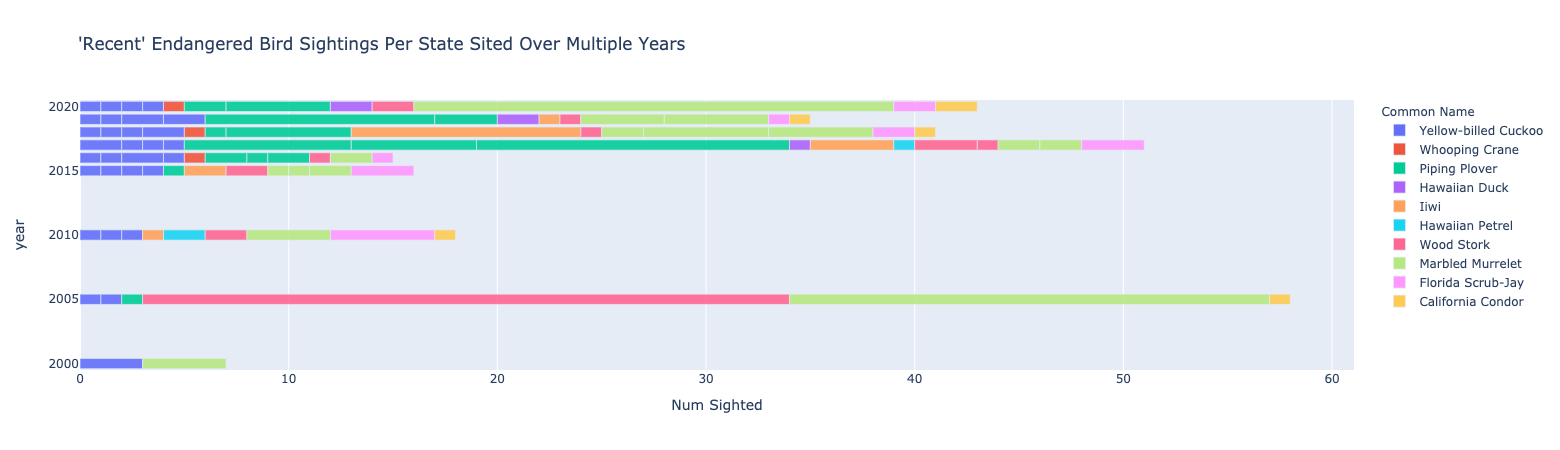

In [23]:
barchart = px.bar(
    endangered_bird_states_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="'Recent' Endangered Bird Sightings Per State Sited Over Multiple Years",
)
barchart

![Autumn Bird](Resources/Images/Autumn_Bird.png)

### Pulling Bird Sightings across the entire US on the first day of Autumn and Filtering DataFrame to show only Endangered Bird Sitings

In [24]:
year_results = []
regionCode = "US"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

birds_usa_df = pd.DataFrame(year_results)

In [25]:
birds_usa_df

Common Name                Scientific Name  \
0         Eastern Screech-Owl                 Megascops asio   
1        Black-bellied Plover           Pluvialis squatarola   
2               shorebird sp.            Charadriiformes sp.   
3              Eastern Phoebe                Sayornis phoebe   
4            Common Nighthawk               Chordeiles minor   
...                       ...                            ...   
6053     Yellow-breasted Chat                 Icteria virens   
6054  Yellow-headed Blackbird  Xanthocephalus xanthocephalus   
6055     Prothonotary Warbler            Protonotaria citrea   
6056    Black-headed Grosbeak      Pheucticus melanocephalus   
6057          Painted Bunting                Passerina ciris   

          Date Sighted                                      Location Name  \
0     2020-09-22 23:54                               Sommer Park Preserve   
1     2020-09-22 23:46                           Park Point--Sailing Club   
2     2020-09-22 23:46                           Park Point--Sailing Club   
3     2020-09-22 23:46                           Park Point--Sailing Club   
4     2020-09-22 23:45                                     Stewart Corner   
...                ...                                                ...   
6053        2000-09-22                                      Prospect Park   
6054        2000-09-22  China Lake NAWS--Sewage Ponds (restricted access)   
6055        2000-09-22                             Leesylvania State Park   
6056        2000-09-22                                       Mt. Davidson   
6057        2000-09-22          ULL Experimental Farm (restricted access)   

      Num Sighted   Latitude   Longitude  year  
0               1  40.411375  -74.775610  2020  
1               8  46.731676  -92.056176  2020  
2               1  46.731676  -92.056176  2020  
3               3  46.731676  -92.056176  2020  
4               1  41.899314  -79.655270  2020  
...           ...        ...         ...   ...  
6053            1  40.660284  -73.968953  2000  
6054           40  35.672219 -117.638340  2000  
6055            1  38.589809  -77.251745  2000  
6056            2  37.738370 -122.453399  2000  
6057            5  30.093489  -91.870032  2000  

[6058 rows x 8 columns]

In [26]:
# Creating a list of all of the birds that are classified as endangered by the US Dept. of Fish and Wildlife Services.
endangered_usa_list = endangered_df["Scientific Name"].to_list()

In [27]:
# Filtering DataFrame to show only birds that are on the endangered list.
endangered_usa_fall_df = birds_usa_df[
    birds_usa_df["Scientific Name"].isin(endangered_usa_list)
]
endangered_usa_fall_df

Common Name           Scientific Name      Date Sighted  \
333   Yellow-billed Cuckoo       Coccyzus americanus  2020-09-22 18:39   
354             Wood Stork        Mycteria americana  2020-09-22 18:32   
399          Piping Plover        Charadrius melodus  2020-09-22 18:20   
522      California Condor   Gymnogyps californianus  2020-09-22 17:14   
552       Marbled Murrelet  Brachyramphus marmoratus  2020-09-22 16:54   
...                    ...                       ...               ...   
5697      Marbled Murrelet  Brachyramphus marmoratus        2005-09-22   
5708     California Condor   Gymnogyps californianus        2005-09-22   
5733            Wood Stork        Mycteria americana  2000-09-22 18:15   
5834      Marbled Murrelet  Brachyramphus marmoratus  2000-09-22 14:45   
5993  Yellow-billed Cuckoo       Coccyzus americanus  2000-09-22 06:20   

                                          Location Name  Num Sighted  \
333                                         Woodman Fen            1   
354             Cumberland Island, High Point (PRIVATE)            5   
399            Galveston--8 mile Beach/Sunny Beach area            1   
522                      Glen Canyon NRA--Navajo Bridge            8   
552                            Boiler Bay State Wayside            4   
...                                                 ...          ...   
5697                                      Yellow Island           23   
5708                    California - Monterey - Big Sur            1   
5733                           Big Black River and I-20            1   
5834  Glacier Bay NP--Icy Strait (@mouth of Glacier ...            4   
5993                      Cape Island--Higbee Beach WMA            3   

       Latitude   Longitude  year  
333   39.730677  -84.126048  2020  
354   30.915645  -81.420958  2020  
399   29.234920  -94.882994  2020  
522   36.817170 -111.630149  2020  
552   44.828817 -124.065900  2020  
...         ...         ...   ...  
5697  48.592257 -123.030402  2005  
5708  36.264654 -121.801049  2005  
5733  32.353300  -90.630199  2000  
5834  58.349866 -136.005249  2000  
5993  38.961389  -74.960833  2000  

[69 rows x 8 columns]

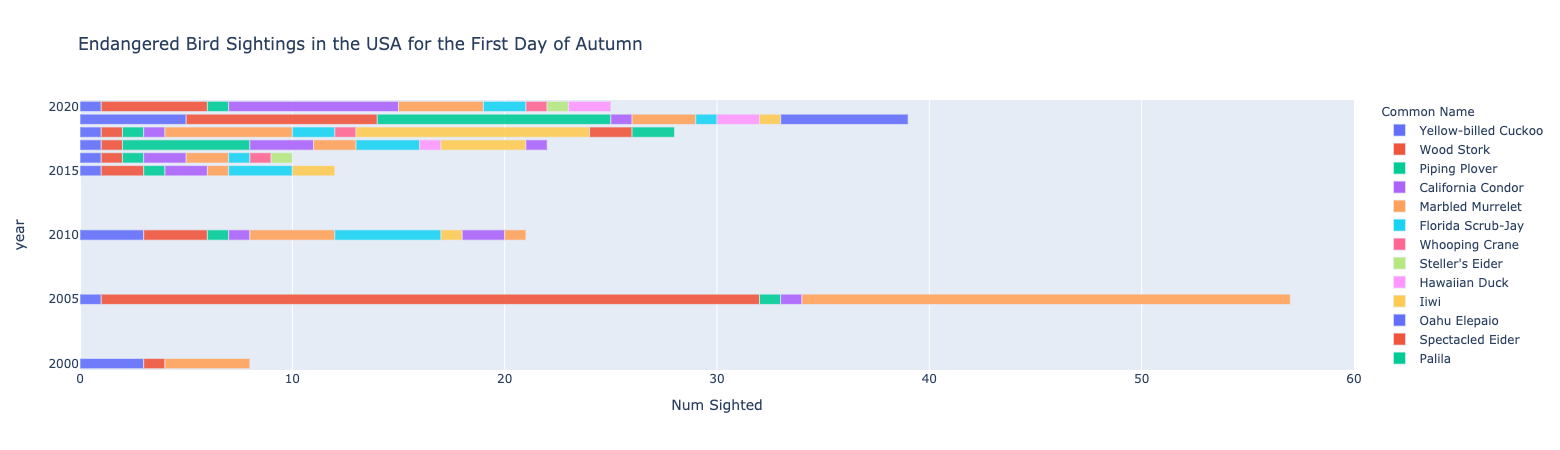

In [28]:
barchart = px.bar(
    endangered_usa_fall_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in the USA for the First Day of Autumn",
)
barchart

### Creating a chart to visualize the change in sightings of endagered birds in the state of Texas over a number of years.

In [29]:
# Bird Sightings in Texas over a number of years.
year_results = []
regionCode = "US-TX"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

tx_df = pd.DataFrame(year_results)
tx_df

Common Name         Scientific Name      Date Sighted  \
0                   Green Heron     Butorides virescens  2020-09-22 23:09   
1                    Dickcissel         Spiza americana  2020-09-22 23:09   
2     Ruby-throated Hummingbird    Archilochus colubris  2020-09-22 21:19   
3              Great Horned Owl        Bubo virginianus  2020-09-22 20:35   
4                      Blue Jay     Cyanocitta cristata  2020-09-22 20:28   
...                         ...                     ...               ...   
2394  Scissor-tailed Flycatcher     Tyrannus forficatus        2000-09-22   
2395               Gray Catbird  Dumetella carolinensis        2000-09-22   
2396      White-crowned Sparrow  Zonotrichia leucophrys        2000-09-22   
2397     MacGillivray's Warbler      Geothlypis tolmiei        2000-09-22   
2398         Townsend's Warbler     Setophaga townsendi        2000-09-22   

                           Location Name  Num Sighted   Latitude   Longitude  \
0                              Bass Loop            1  30.549047  -97.663546   
1                              Bass Loop            1  30.549047  -97.663546   
2     Lakes of Parkway Bylake or Bywater            1  29.747171  -95.628974   
3                            E Brown Ave            1  30.365294 -103.659657   
4                          Barry's Place            2  29.809506  -95.764204   
...                                  ...          ...        ...         ...   
2394    My Habitat, Kilgore, Rusk Co, TX           12  32.363723  -94.868317   
2395                      Amarillo South            1  35.174650 -101.848755   
2396                       Lake Tawakoni            1  32.859979  -95.972443   
2397   Mackenzie Park, Lubbock (PHP 024)            2  33.585600 -101.828715   
2398   Mackenzie Park, Lubbock (PHP 024)            2  33.585600 -101.828715   

      year  
0     2020  
1     2020  
2     2020  
3     2020  
4     2020  
...    ...  
2394  2000  
2395  2000  
2396  2000  
2397  2000  
2398  2000  

[2399 rows x 8 columns]

In [30]:
endangered_tx_fall_df = tx_df[tx_df["Scientific Name"].isin(endangered_usa_list)]
endangered_tx_fall_df

Common Name      Scientific Name      Date Sighted  \
125          Piping Plover   Charadrius melodus  2020-09-22 18:20   
226   Yellow-billed Cuckoo  Coccyzus americanus  2020-09-22 15:43   
256             Wood Stork   Mycteria americana  2020-09-22 13:45   
359   Yellow-billed Cuckoo  Coccyzus americanus  2019-09-22 20:08   
361             Wood Stork   Mycteria americana  2019-09-22 20:08   
648          Piping Plover   Charadrius melodus  2019-09-22 11:20   
836             Wood Stork   Mycteria americana  2018-09-22 18:21   
865          Piping Plover   Charadrius melodus  2018-09-22 17:37   
886   Yellow-billed Cuckoo  Coccyzus americanus  2018-09-22 17:11   
1108         Piping Plover   Charadrius melodus  2017-09-22 19:18   
1135            Wood Stork   Mycteria americana  2017-09-22 19:00   
1367  Yellow-billed Cuckoo  Coccyzus americanus  2017-09-22 09:00   
1428            Wood Stork   Mycteria americana  2016-09-22 19:30   
1636         Piping Plover   Charadrius melodus  2016-09-22 10:35   
1660  Yellow-billed Cuckoo  Coccyzus americanus  2016-09-22 09:24   
1858  Yellow-billed Cuckoo  Coccyzus americanus  2015-09-22 14:55   
1893         Piping Plover   Charadrius melodus  2015-09-22 12:00   
2011            Wood Stork   Mycteria americana  2015-09-22 06:55   
2139  Yellow-billed Cuckoo  Coccyzus americanus  2010-09-22 10:30   
2162            Wood Stork   Mycteria americana  2010-09-22 09:05   
2284            Wood Stork   Mycteria americana  2005-09-22 09:00   
2320  Yellow-billed Cuckoo  Coccyzus americanus  2005-09-22 07:35   

                                          Location Name  Num Sighted  \
125            Galveston--8 mile Beach/Sunny Beach area            1   
226       Quintana Neotropical Bird Sanctuary (UTC 121)            1   
256                           White Point & Koonce Loop            3   
359                           Caddo Lake SP (PPW-E 089)            5   
361                           Caddo Lake SP (PPW-E 089)            9   
648        Kleberg County Beach N. of National Seashore            8   
836     Highway 6, Houston, Texas, US (29.792, -95.646)            1   
865   East Cotter Avenue, Port Aransas, Texas, US (2...            1   
886       Bentsen-Rio Grande Val. SP--HQ Buildings area            1   
1108        Bolivar Flats Shorebird Sanctuary (UTC 058)            6   
1135                          Texas A&M--Corpus Christi            1   
1367            Resaca de la Palma National Battlefield            1   
1428                                          Hwy 44/24            1   
1636  South Padre Is.--WBC/Conv. Center/Laguna Madre...           19   
1660  Trinity River NWR--Champion Lake (UTC 032B)(te...            1   
1858             Edinburg Scenic Wetlands WBC (LTC 061)            1   
1893                          Texas City Dike (UTC 074)            1   
2011               Salineño Wildlife Preserve (LTC 080)            1   
2139                        Lake Weatherford--Northwest            1   
2162  Texas-Nueces Co.-Corpus Christi- Bazemore Park...            3   
2284             Hazel Bazemore Park Hawkwatch Platform            3   
2320               Heard Nat. Sci. Mus.& Wildlife Sanct            1   

       Latitude  Longitude  year  
125   29.234920 -94.882994  2020  
226   28.933623 -95.308725  2020  
256   27.871062 -97.419934  2020  
359   32.692482 -94.176822  2019  
361   32.692482 -94.176822  2019  
648   27.551294 -97.236375  2019  
836   29.791536 -95.645503  2018  
865   27.835342 -97.047385  2018  
886   26.185606 -98.379940  2018  
1108  29.371137 -94.728708  2017  
1135  27.711305 -97.327538  2017  
1367  25.937467 -97.486528  2017  
1428  27.784075 -97.603751  2016  
1636  26.140091 -97.174823  2016  
1660  29.920977 -94.799020  2016  
1858  26.290582 -98.135191  2015  
1893  29.383895 -94.867115  2015  
2011  26.514858 -99.116206  2015  
2139  32.801662 -97.701190  2010  
2162  27.865921 -97.642574  2010  
2284  27.866055 -97.642735  2005  


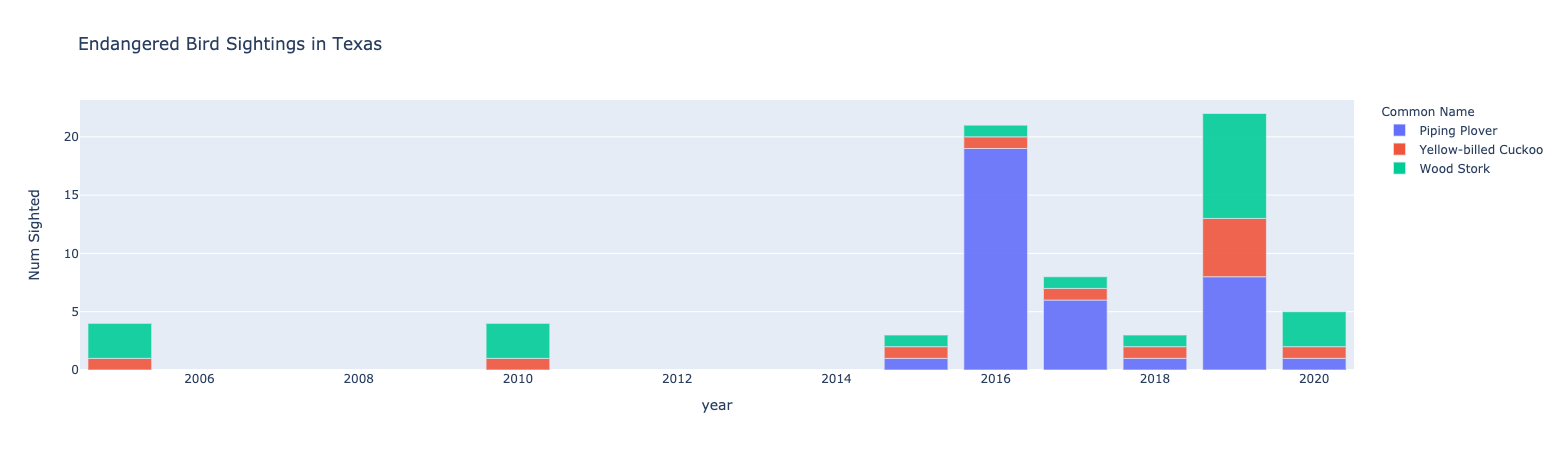

In [31]:
barchart = px.bar(
    endangered_tx_fall_df,
    x="year",
    y="Num Sighted",
    color="Common Name",
    opacity=0.9,
    orientation="v",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in Texas",
)
barchart

In [35]:
fig = px.scatter_mapbox(
    endangered_tx_fall_df,
    lat="Latitude",
    lon="Longitude",
    color="Common Name",
    hover_data=["Common Name", "Scientific Name", "Location Name", "year"],
    title="Endangered Bird Sightings in Texas (2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020)",
    height=750,
)

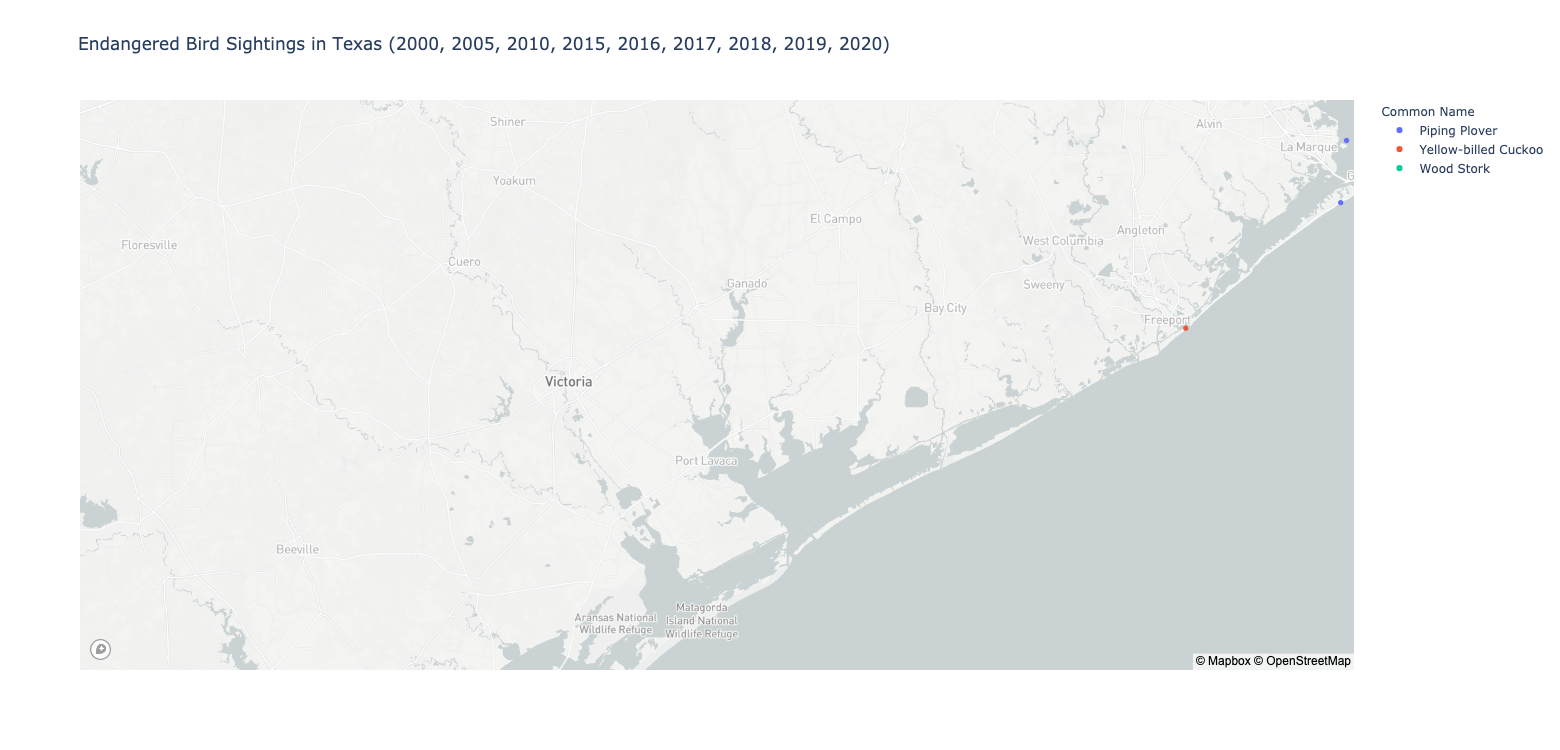

In [36]:
fig.show()

![Endangered Texas Birds](Resources/Images/Endangered_Texas.png)